In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
#BatchNormalization,Dropout

In [13]:
#generators divides data into batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'C:\\Users\\KIIT\\OneDrive\\Desktop\\AD Lab\\cat_dog_classification\\cat_dog_data\\training_set\\training_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'C:\\Users\\KIIT\\OneDrive\\Desktop\\AD Lab\\cat_dog_classification\\cat_dog_data\\test_set\\test_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)



Found 6017 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [14]:
# Normalize

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [15]:
# create CNN model

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 177s 926ms/step - accuracy: 0.6560 - loss: 0.7220 - val_accuracy: 0.5358 - val_loss: 0.6916
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 180s 950ms/step - accuracy: 0.6958 - loss: 0.5851 - val_accuracy: 0.6436 - val_loss: 0.6497
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 2326s 12s/step - accuracy: 0.7417 - loss: 0.5223 - val_accuracy: 0.6639 - val_loss: 0.6604
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 164s 865ms/step - accuracy: 0.7907 - loss: 0.4532 - val_accuracy: 0.7261 - val_loss: 0.6026
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.8504 - loss: 0.3383 - val_accuracy: 0.7019 - val_loss: 0.7699
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.8962 - loss: 0.2416 - val_accuracy: 0.7084 - val_loss: 1.1218
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.9429 - loss: 0.1402 - val_accuracy: 0.7088 - val_loss: 1.3174
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.9713 - loss: 0.0743

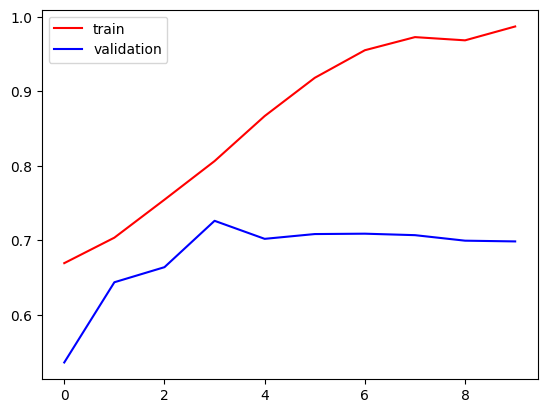

In [20]:
# training accuracy and validation accuracy graph

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

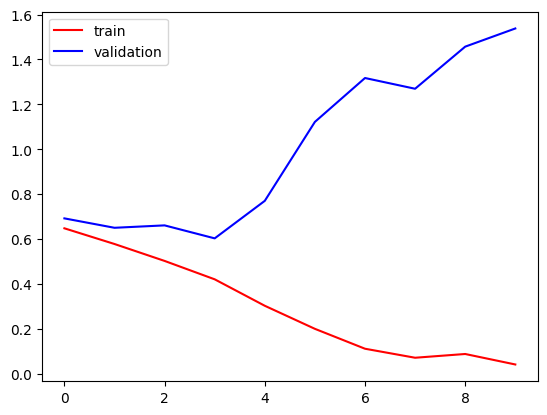

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [22]:
import cv2

In [23]:
test_img = cv2.imread('cat2.jpeg')

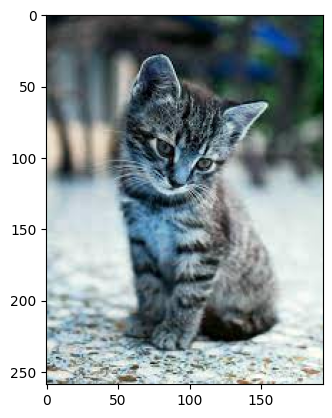

In [24]:
plt.imshow(test_img)

In [25]:
test_img.shape

(259, 194, 3)

In [26]:
test_img = cv2.resize(test_img,(256,256))

In [27]:
test_input=test_img.reshape((1,256,256,3))

In [28]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


array([[0.]], dtype=float32)

In [29]:
model.save("catdog_model.h5")

